<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression in Machine Learning**


The linear model is formally defined as an affine transformation mapping an input vector $\mathbf{x} \in \mathbb{R}^D$ to a scalar output $y \in \mathbb{R}$. The model is parameterized by a weight vector $\boldsymbol{\theta}$ (often denoted as $\mathbf{w}$) and an intercept (bias) $\theta_0$.$$f(\mathbf{x}) = \boldsymbol{\theta}^\top \mathbf{x} + \theta_0$$

## **1.1 Representation of Data as Matrices**

In machine learning, we rarely process data points one by one. Instead, we stack them into matrices to utilize efficient linear algebra operations. If we have $N$ data points, each with $D$ features, we represent the entire dataset as a Design Matrix $\mathbf{X}$ of shape $N \times D$, and the targets as a vector $\mathbf{y}$ of shape $N$.

Imagine you have a spreadsheet of used cars. Each row is a single car. Each column is a feature, like "horsepower," "weight," or "age." In math, we call this whole spreadsheet a Matrix (specifically, the Design Matrix). The price of each car is what we want to predict, so we rip that column out and call it the Target Vector.To make the math work for the "base price" (the y-intercept), we have to add a "ghost column" of 1s to the start of our spreadsheet. This is like saying every car has 1 unit of "existence" that contributes to the base price.

In [ ]:
import numpy as np
import pandas as pd

# We will generate a synthetic dataset representing Car Prices
# Features: [Horsepower, Age]
# Target: Price

def generate_car_data(n_samples=5):
    # Random horsepower between 100 and 300
    horsepower = np.random.randint(100, 300, n_samples)
    # Random age between 1 and 10 years
    age = np.random.randint(1, 10, n_samples)

    # True relationship: Price = 100 * HP - 1000 * Age + 5000 (Base)
    # We add some random noise because real life isn't perfect
    noise = np.random.normal(0, 500, n_samples)
    price = 100 * horsepower - 1000 * age + 5000 + noise

    # Stack features into a matrix (N x 2)
    X_raw = np.column_stack((horsepower, age))

    return X_raw, price

# 1. Generate the data
X_raw, y = generate_car_data()

print("Original Feature Matrix (Rows=Cars, Cols=Features):")
print(X_raw)

Original Feature Matrix (Rows=Cars, Cols=Features):
[[112   9]
 [283   1]
 [285   6]
 [194   8]
 [276   8]]


In [ ]:
# 2. Augment with the 'Ghost Column' of 1s for the bias term
# We create a column of ones with the same number of rows as X
ones_column = np.ones((X_raw.shape[0], 1))

# We stick this column to the left side of our features
X_design = np.hstack((ones_column, X_raw))

print("\nDesign Matrix (with bias column):")
print(X_design)
print("\nTarget Vector (Prices):")
print(y)


Design Matrix (with bias column):
[[  1. 112.   9.]
 [  1. 283.   1.]
 [  1. 285.   6.]
 [  1. 194.   8.]
 [  1. 276.   8.]]

Target Vector (Prices):
[ 7121.50938124 31912.29142255 28617.22062939 16531.50518736
 24715.00854077]


## Task 1.1:

1. Load the Auto MPG dataset (a real-world dataset) using pandas.
2. Select 'displacement' and 'horsepower' as your features and 'mpg' as your target.
3. Convert these to numpy arrays.
4. Create the Design Matrix $\mathbf{X}$ by adding the column of ones to the features.
5. Print the shape of your Design Matrix; it should be $(N, 3)$.

In [ ]:
#WRITE CODE HERE

## **1.2. Least Squares and Orthogonal Projection**


The second conceptual hurdle is defining "best fit." The geometric perspective defines the best fit as the parameter vector $\boldsymbol{\theta}$ that minimizes the Euclidean distance between the target vector $\mathbf{y}$ and the subspace spanned by the feature columns of $\mathbf{X}$. This is the method of Ordinary Least Squares (OLS).The loss function is defined as the sum of squared residuals:$$J(\boldsymbol{\theta}) = \frac{1}{2} ||\mathbf{X}\boldsymbol{\theta} - \mathbf{y}||^2$$Minimizing this quadratic function yields the famous Normal Equations:$$\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} = \mathbf{X}^\top \mathbf{y}$$

Imagine you are standing in a room (the space of your data).

The target value $\mathbf{y}$ is a point hanging in the air. Your features define the floor of the room.

You want to find the point on the floor that is directly underneath the hanging point $\mathbf{y}$. This is the "shadow" of $\mathbf{y}$ on the floor.

The math formula $\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$ is the instruction manual for calculating exactly where that shadow falls.

It tells you exactly how much of each feature to mix together to get as close as possible to the target.

In [ ]:
def compute_ols_weights(X, y):
    """
    Computes the optimal weights using the Normal Equation.
    Formula: theta = (X^T * X)^-1 * X^T * y
    """
    # 1. Compute X Transpose (X^T)
    X_T = X.T

    # 2. Compute the Gram Matrix (X^T * X)
    # This matrix captures how features are correlated with each other
    gram_matrix = np.dot(X_T, X)

    # 3. Compute the inverse of the Gram Matrix
    # Note: In real production code, we use np.linalg.solve for stability
    # but here we use inv to explicitly show the formula.
    gram_inv = np.linalg.inv(gram_matrix)

    # 4. Compute X^T * y (Correlation between features and target)
    moment_vector = np.dot(X_T, y)

    # 5. Multiply inverse with moment vector to get weights
    theta = np.dot(gram_inv, moment_vector)

    return theta

# Using the car data from the previous step
theta_estimated = compute_ols_weights(X_design, y)

print("Estimated Weights:")
print(f"Base Price (Bias): {theta_estimated[0]}")
print(f"Price per Horsepower: {theta_estimated[1]}")
print(f"Price per Year of Age: {theta_estimated[2]}")

Estimated Weights:
Base Price (Bias): 3164.5265627375843
Price per Horsepower: 105.35401928224753
Price per Year of Age: -877.5693695924256


In [ ]:
# Making a prediction for a new car
# HP=200, Age=5
new_car = np.array([1,200,5]) # Don't forget the bias 1!
predicted_price = np.dot(theta_estimated, new_car)
print(f"\nPredicted price for 200HP, 5yo car: ${predicted_price}")


Predicted price for 200HP, 5yo car: $19847.483571224962


## Task 1.2

- Using the auto_mpg design matrix $\mathbf{X}$ and target $\mathbf{y}$ you created in the previous task
- Implement the compute_ols_weights function.
- Calculate the weights for predicting MPG.
- Interpret the weights: Does higher horsepower increase or decrease the MPG based on your model? (Hint: Check the sign of the weight associated with the horsepower column).

## **2. Probabilistic Modeling and Maximum Likelihood Estimation (MLE)**
While the geometric view provides the mechanics of regression, the probabilistic view provides the justification for why we minimize squared error. This module introduces Maximum Likelihood Estimation (MLE), a cornerstone of statistical machine learning.

Maximum Likelihood Estimation (MLE) is a detective technique.

We ask: "Which line makes the data we actually observed the most probable?"

If we assume the data points are scattered around the true line like a bell curve (Gaussian distribution), we can calculate a "likelihood score" for any candidate line. The best line is the one with the highest score.

-----

Imagine you are throwing darts at a line drawn on the floor. You are a good player, so your darts usually land close to the line, and rarely land far away. This spread follows a bell curve.

Now, reverse the situation.

You see a bunch of darts sticking in the floor, but the line has been erased. You have to draw the line back in. Where do you put it? You draw it right through the middle of the darts. Why? Because that position makes it most likely that the darts landed where they did. If you drew the line far away, it would be extremely unlikely (low probability) that you threw the darts so badly they landed over here.

MLE is just the math for "drawing the line through the middle of the mess."

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_residuals(X, y, theta, sigma=500):
    """
    Visualizes the Gaussian probability of data points given a line.
    """
    # Predict values
    y_pred = X.dot(theta)

    # Calculate residuals (distance from line)
    residuals = y - y_pred

    # Calculate Likelihood score (ignoring constants for simplicity)
    # We sum the log-probabilities
    log_likelihood = np.sum(norm.logpdf(residuals, loc=0, scale=sigma))

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], y, color='blue', label='Data Points') # X[:,1] is raw feature
    plt.plot(X[:, 1], y_pred, color='red', label='Model Line')

    # Draw lines showing residuals
    for i in range(len(X)):
        plt.plot([X[i, 1], X[i, 1]], [y[i], y_pred[i]], 'g--', alpha=0.5)

    plt.title(f"Linear Fit with Residuals\nLog-Likelihood Score: {log_likelihood:.2f}")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

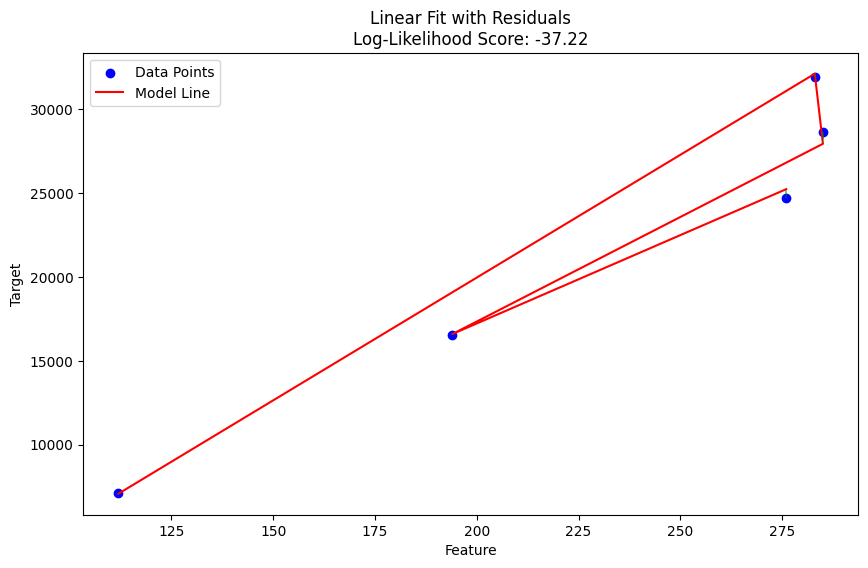

In [ ]:
# Let's see how a 'bad' guess looks vs a 'good' guess
# Good guess (from OLS)
plot_gaussian_residuals(X_design, y, theta_estimated)

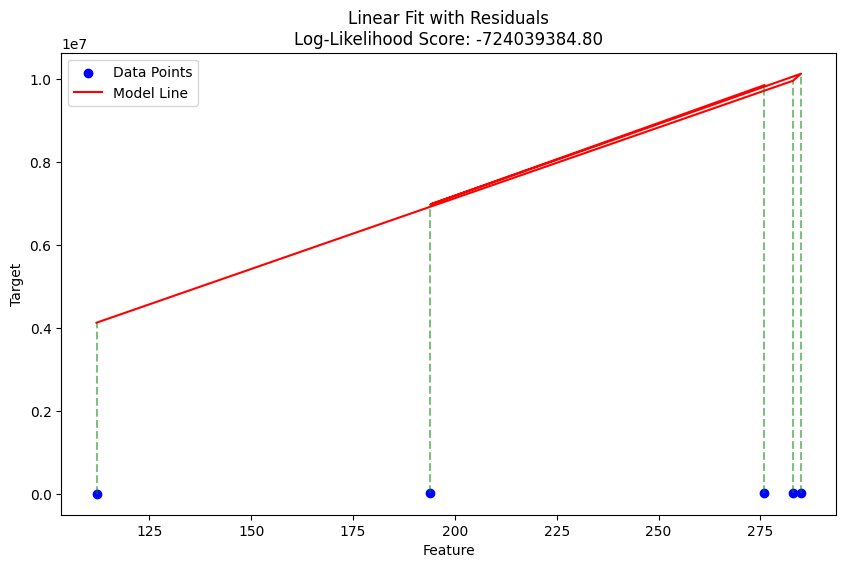

In [ ]:
# Bad guess (random weights)
theta_bad = np.array([25000,35000,20000])
plot_gaussian_residuals(X_design, y, theta_bad)

## Task 2.1 :

- Using the auto_mpg data.

- Define a "bad" set of weights (e.g., set them all to zero).

- Calculate the Log-Likelihood of the bad weights.

- Calculate the Log-Likelihood of the OLS weights you found in Task 1.

- Compare the numbers. Note that Log-Likelihoods are usually negative numbers. The value closer to 0 (less negative) is better. Confirm that the OLS weights have a higher likelihood than the zero weights.

In [ ]:
#WRITE CODE HERE

## **3. Model Complexity, Polynomials, and Regularization**

**3.1 Polynomials and Overfitting**

Sometimes data is curved, not straight. We can still use linear regression by "cheating." We create new features that are powers of the original feature ($x^2, x^3$, etc.). This is called Polynomial Regression. Even though the curve looks bendy, the math is still linear because we are just multiplying weights by these new numbers.

---
Imagine trying to fit a piece of rigid wood (a straight line) to a curved banana. It won't work. Now imagine you have a flexible ruler. By bending it (adding $x^2, x^3$), you can match the curve of the banana.However, if you make the ruler too flexible (like a piece of string), and you try to touch every single spot on a bumpy banana, the string will wiggle and loop wildly between the bumps. This is **Overfitting**. The string touches every data point, but it looks like a mess and doesn't represent the general shape of the banana anymore.

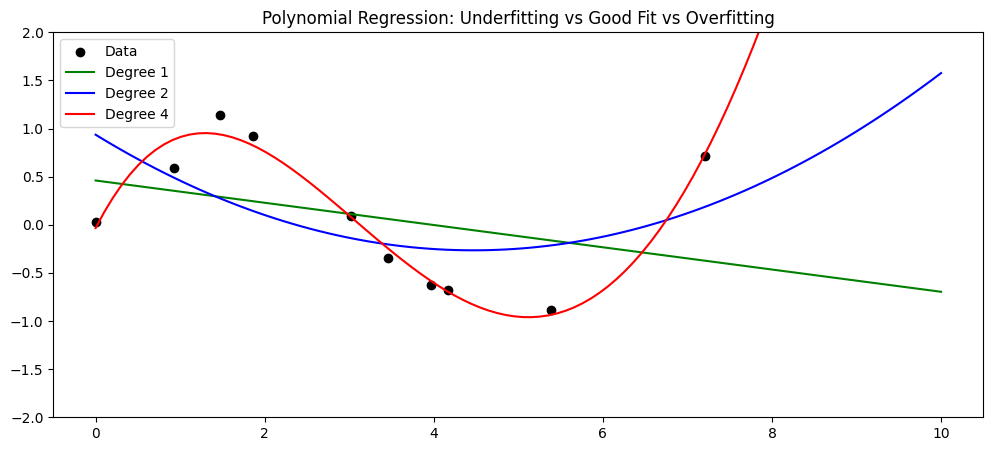

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def demo_polynomial_overfitting(n_points=10):
    # Generate noisy sine wave data
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(n_points)
    y = np.sin(x) + 0.1 * rng.randn(n_points)

    # Create a range of x values for smooth plotting
    x_plot = np.linspace(0, 10, 100)

    plt.figure(figsize=(12, 5))

    # Try different degrees
    degrees = [1,2,4]
    colors = ['green', 'blue', 'red']

    plt.scatter(x, y, color='black', label='Data')

    for i, degree in enumerate(degrees):
        # Create a pipeline:
        # 1. Turn x into [1, x, x^2,..., x^degree]
        # 2. Run Linear Regression
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x[:, np.newaxis], y)
        y_plot = model.predict(x_plot[:, np.newaxis])

        plt.plot(x_plot, y_plot, color=colors[i],
                 label=f'Degree {degree}')

    plt.ylim(-2, 2)
    plt.legend()
    plt.title("Polynomial Regression: Underfitting vs Good Fit vs Overfitting")
    plt.show()

demo_polynomial_overfitting()

**3.2 Regularization (Ridge Regression)**

To stop the "string" from wiggling too much, we use Regularization. We add a penalty to the loss function that punishes the model for having very large weights. Large weights usually cause the wild oscillations seen in overfitting. This is called Ridge Regression (or L2 Regularization).

---
Think of the weights $\boldsymbol{\theta}$ as the "energy" or "tension" in the string. To make the string curve wildly to hit every point, you have to pull it very tight and twist it hard (use large weights). Regularization is like adding a tax on tension. You tell the model: "You can fit the data, but I will charge you a fee for every bit of tension you put in the string." The model naturally becomes lazy; it tries to fit the data reasonably well, but it refuses to twist wildly because that would be too expensive (high tax). The result is a smoother curve.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


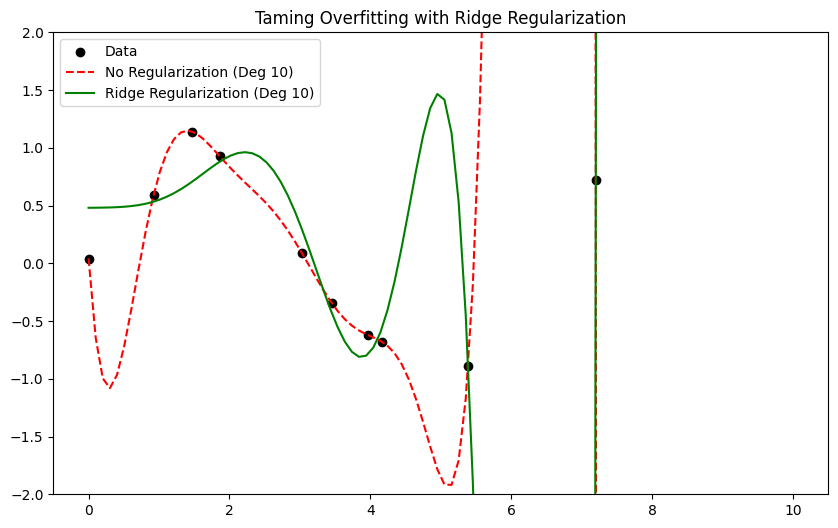

In [ ]:
from sklearn.linear_model import Ridge

def demo_ridge_regularization(n_points=10):
    # Same data
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(n_points)
    y = np.sin(x) + 0.1 * rng.randn(n_points)
    x_plot = np.linspace(0, 10, 100)

    # Use a high degree that normally overfits
    degree = 10

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='black', label='Data')

    # 1. Unregularized (Standard Linear Regression)
    # This is like Ridge with alpha=0
    model_wild = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_wild.fit(x[:, np.newaxis], y)
    y_wild = model_wild.predict(x_plot[:, np.newaxis])
    plt.plot(x_plot, y_wild, 'r--', label=f'No Regularization (Deg {degree})')

    # 2. Regularized (Ridge)
    # alpha is the "tax rate" (lambda)
    model_tame = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))
    model_tame.fit(x[:, np.newaxis], y)
    y_tame = model_tame.predict(x_plot[:, np.newaxis])
    plt.plot(x_plot, y_tame, 'g-', label=f'Ridge Regularization (Deg {degree})')

    plt.ylim(-2, 2)
    plt.legend()
    plt.title("Taming Overfitting with Ridge Regularization")
    plt.show()

demo_ridge_regularization()

## Task 3

1. Use the generate_car_data function but reduce the number of samples to just 5.

2. Fit a Polynomial Regression model of Degree 4 (which is too complex for 5 points).

3. Print the coefficients (weights) of this model. Notice how huge they are (e.g., millions or billions).

4. Fit a Ridge Regression model (Degree 4) with alpha=10.

5. Print the coefficients of the Ridge model. Notice how much smaller they are.

Explain in a markdown cell: Why does the unregularized model have such huge weights?.

## **4. Bayesian Linear Regression**

Standard Linear Regression gives you one single line. But if you have very little data, are you sure that one line is the correct one? Probably not.

Bayesian Regression doesn't give you a single line; it gives you a "cloud" of possible lines. It tells you: "I'm pretty sure the line is somewhere in this region."
Where there is lots of data, the cloud is tight (high confidence). Where there is no data, the cloud puffs out (low confidence).

---
Imagine you are holding a handful of spaghetti strands. You throw them on a table and try to arrange them so they all pass through two specific points (data). You can wiggle the spaghetti strands a bit; many different angles will still touch those two points.

Standard regression picks the one strand of spaghetti that fits best.

Bayesian regression keeps all the strands that fit reasonably well. When you ask for a prediction, Bayesian regression looks at where all the strands go. If all the strands go to the same place, the model says "I'm confident." If the strands splay out in different directions, the model says "I don't know, it could be any of these."

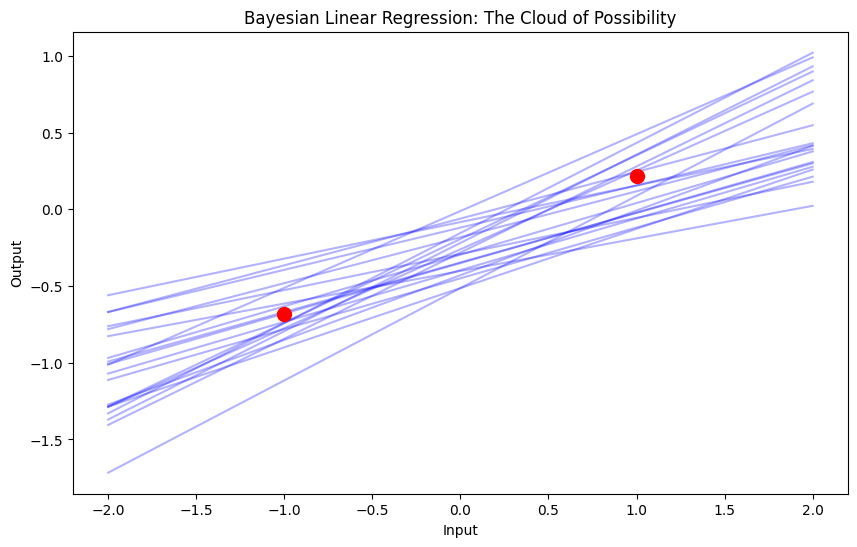

In [ ]:
def bayesian_inference_demo():
    # True function
    def f(x, noise_amount):
        y = -0.3 + 0.5 * x
        noise = np.random.normal(0, noise_amount, len(x))
        return y + noise

    # Generate data
    X = np.array([-1, 1]) # Only 2 data points!
    y = f(X, noise_amount=0.1)

    # Add bias term
    X_design = np.column_stack((np.ones(len(X)), X))

    # Hyperparameters
    alpha = 2.0  # Prior precision (how sure we are that weights are small)
    beta = 25.0  # Noise precision (how sure we are about the data)

    # Calculate Posterior Covariance (S_N) and Mean (m_N)
    # Formula: S_N = inv(alpha*I + beta*X.T*X)
    S_N_inv = alpha * np.eye(2) + beta * np.dot(X_design.T, X_design)
    S_N = np.linalg.inv(S_N_inv)

    # Formula: m_N = beta * S_N * X.T * y
    m_N = beta * np.dot(S_N, np.dot(X_design.T, y))

    # Visualize the "Cloud of Lines"
    plt.figure(figsize=(10, 6))

    # 1. Plot the data points
    plt.scatter(X, y, color='red', s=100, zorder=10, label='Data')

    # 2. Sample 20 possible lines from the posterior distribution
    # We treat the weights as random variables
    possible_weights = np.random.multivariate_normal(m_N, S_N, 20)

    x_range = np.linspace(-2, 2, 100)
    x_range_design = np.column_stack((np.ones(100), x_range))

    for i, w in enumerate(possible_weights):
        y_sample = np.dot(x_range_design, w)
        plt.plot(x_range, y_sample, 'b-', alpha=0.3)

    plt.title("Bayesian Linear Regression: The Cloud of Possibility")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.show()

bayesian_inference_demo()

## Task 4

1. Run the bayesian_inference_demo.

2. Change X to include more points (e.g., np.linspace(-1, 1, 10)). Rerun and observe what happens to the "cloud" of lines. (Answer: It should get tighter/narrower).

3. Change beta to a small number (e.g., 1.0). This means we assume the data is very noisy. Observe the result. (Answer: The cloud should get wider, as we trust the data less).